### [Question 1] Looking back at Scratch

To implement deep learning from scratch, we needed:

- **Dataset preparation and preprocessing**  
- **Weight and bias initialization**  
- **Forward propagation through network layers**  
- **Activation functions** (like ReLU)  
- **Loss function calculation**  
- **Backpropagation** for gradient calculation  
- **Weight updates** using optimization algorithms  
- **Epoch loop structure**  
- **Batch processing**  
- **Validation/test evaluation metrics**  
- **Model evaluation**


### [Question 2] Comparing Scratch Implementation with TensorFlow

Here's how the elements required for deep learning are implemented in TensorFlow:

- **Weight initialization**:  
  Implemented via `tf.Variable(tf.random_normal())`  
  *(lines 67–69)*

- **Bias initialization**:  
  Similarly handled with `tf.Variable(tf.random_normal())`  
  *(lines 71–73)*

- **Forward propagation**:  
  Implemented through matrix operations like `tf.matmul()` and `tf.add()`  
  *(lines 73–77)*

- **Activation functions**:  
  Applied via `tf.nn.relu()`  
  *(lines 74, 76)*

- **Loss function**:  
  Calculated using `tf.nn.sigmoid_cross_entropy_with_logits()`  
  *(lines 80–81)*

- **Optimization**:  
  Handled by `tf.train.AdamOptimizer()` and its `minimize()` method  
  *(lines 83–84)*

- **Epoch loop**:  
  Implemented with a Python `for` loop  
  *(lines 91–102)*

- **Batch processing**:  
  Managed by the `GetMiniBatch` class  
  *(lines 27–52)*

- **Evaluation metrics**:  
  Calculated with operations like `tf.equal()` and `tf.reduce_mean()`  
  *(lines 85–87)*

- **Model execution**:  
  Controlled through a TensorFlow session with `tf.Session()`  
  *(lines 89–107)*

---

**Key difference**:  
TensorFlow builds a **computational graph** first and then **executes it within a session**,  
whereas in scratch implementations, we directly **execute calculations in sequence**.


TensorFlow version: 2.13.0
Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 1.0876 - accuracy: 0.3646 - val_loss: 1.0692 - val_accuracy: 0.3750
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1.0569 - accuracy: 0.3646 - val_loss: 1.0347 - val_accuracy: 0.3750
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1.0219 - accuracy: 0.3646 - val_loss: 0.9959 - val_accuracy: 0.3750
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9753 - accuracy: 0.4375 - val_loss: 0.9419 - val_accuracy: 0.7083
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9107 - accuracy: 0.6875 - val_loss: 0.8613 - val_accuracy: 0.7083
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8232 - accuracy: 0.6875 - val_loss: 0.7650 - val_accuracy: 0.7083
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7237 - accuracy: 0.6875 - val_loss: 0.6668 - val_ac

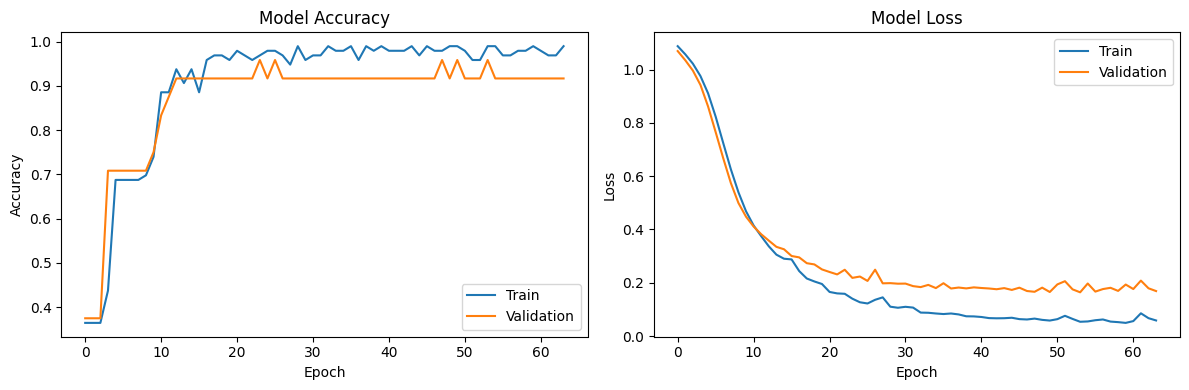

1/1 [==============================] - 0s 78ms/step

Sample predictions:
Sample 1: Predicted as Iris-virginica, Actual: Iris-virginica
Sample 2: Predicted as Iris-versicolor, Actual: Iris-versicolor
Sample 3: Predicted as Iris-setosa, Actual: Iris-setosa
Sample 4: Predicted as Iris-virginica, Actual: Iris-virginica
Sample 5: Predicted as Iris-setosa, Actual: Iris-setosa


In [4]:
"""
TensorFlow implementation for Iris dataset classification (all three classes)
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf


print(f"TensorFlow version: {tf.__version__}")

# Load dataset
df = pd.read_csv("Iris.csv")
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# Convert to NumPy arrays
X = np.array(X)

# One-hot encode the labels
y_encoded = pd.get_dummies(y).values

# Split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Hyperparameters
learning_rate = 0.001
batch_size = 10
num_epochs = 100
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = y_train.shape[1]  # 3 classes

# Create the neural network model using Keras API
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(n_input,),
                             kernel_initializer=tf.keras.initializers.RandomNormal()),
        tf.keras.layers.Dense(n_hidden2, activation='relu',
                             kernel_initializer=tf.keras.initializers.RandomNormal()),
        tf.keras.layers.Dense(n_classes, activation='softmax',
                             kernel_initializer=tf.keras.initializers.RandomNormal())
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Set random seed for reproducibility
tf.random.set_seed(0)
np.random.seed(0)

# Create and train the model
model = create_model()

# Define callbacks for training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.3f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# Make predictions on a few samples
sample_predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(sample_predictions, axis=1)
actual_classes = np.argmax(y_test[:5], axis=1)

# Convert numeric classes back to species names
class_names = list(pd.get_dummies(y).columns)

print("\nSample predictions:")
for i in range(5):
    print(f"Sample {i+1}: Predicted as {class_names[predicted_classes[i]]}, Actual: {class_names[actual_classes[i]]}")

TensorFlow version: 2.13.0
Epoch 1/200
30/30 [==============================] - 1s 10ms/step - loss: 0.9569 - mae: 0.7084 - val_loss: 0.7528 - val_mae: 0.6431 - lr: 0.0010
Epoch 2/200
30/30 [==============================] - 0s 5ms/step - loss: 0.7203 - mae: 0.5821 - val_loss: 0.4071 - val_mae: 0.4149 - lr: 0.0010
Epoch 3/200


c:\users\dr\documents\prog\datascience&machinelearning\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 0s 5ms/step - loss: 0.4049 - mae: 0.4118 - val_loss: 0.2806 - val_mae: 0.3791 - lr: 0.0010
Epoch 4/200
30/30 [==============================] - 0s 5ms/step - loss: 0.3418 - mae: 0.3981 - val_loss: 0.2592 - val_mae: 0.3706 - lr: 0.0010
Epoch 5/200
30/30 [==============================] - 0s 5ms/step - loss: 0.3244 - mae: 0.3896 - val_loss: 0.2478 - val_mae: 0.3570 - lr: 0.0010
Epoch 6/200
30/30 [==============================] - 0s 4ms/step - loss: 0.3174 - mae: 0.3793 - val_loss: 0.2591 - val_mae: 0.3703 - lr: 0.0010
Epoch 7/200
30/30 [==============================] - 0s 4ms/step - loss: 0.3160 - mae: 0.3843 - val_loss: 0.2513 - val_mae: 0.3640 - lr: 0.0010
Epoch 8/200
30/30 [==============================] - 0s 5ms/step - loss: 0.3138 - mae: 0.3802 - val_loss: 0.2357 - val_mae: 0.3441 - lr: 0.0010
Epoch 9/200
30/30 [==============================] - 0s 4ms/step - loss: 0.3143 - mae: 0.3728 - val_loss: 0.2431 - val_mae: 0.3540 - lr: 0.0010
Epoc

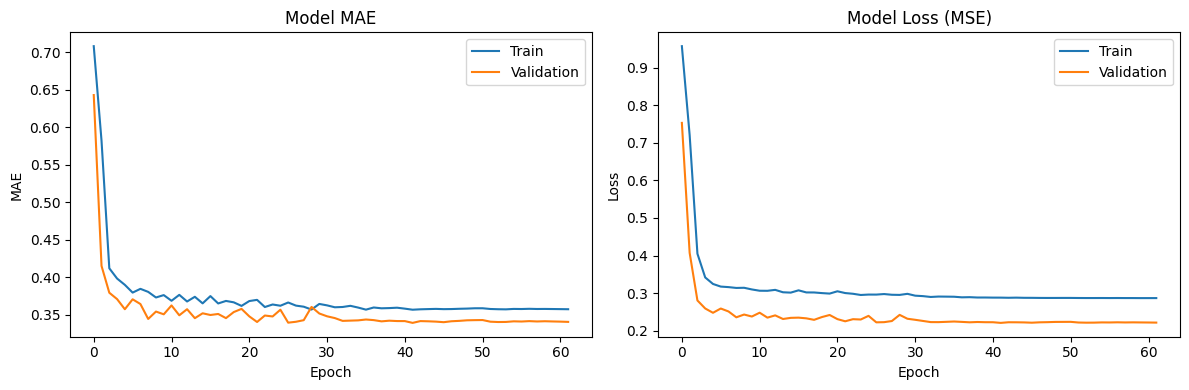

10/10 [==============================] - 0s 2ms/step

Sample predictions (original scale):
Predicted: $244518.83, Actual: $200624.00
Predicted: $151651.80, Actual: $133000.00
Predicted: $131518.62, Actual: $110000.00
Predicted: $211288.19, Actual: $192000.00
Predicted: $136496.47, Actual: $88000.00


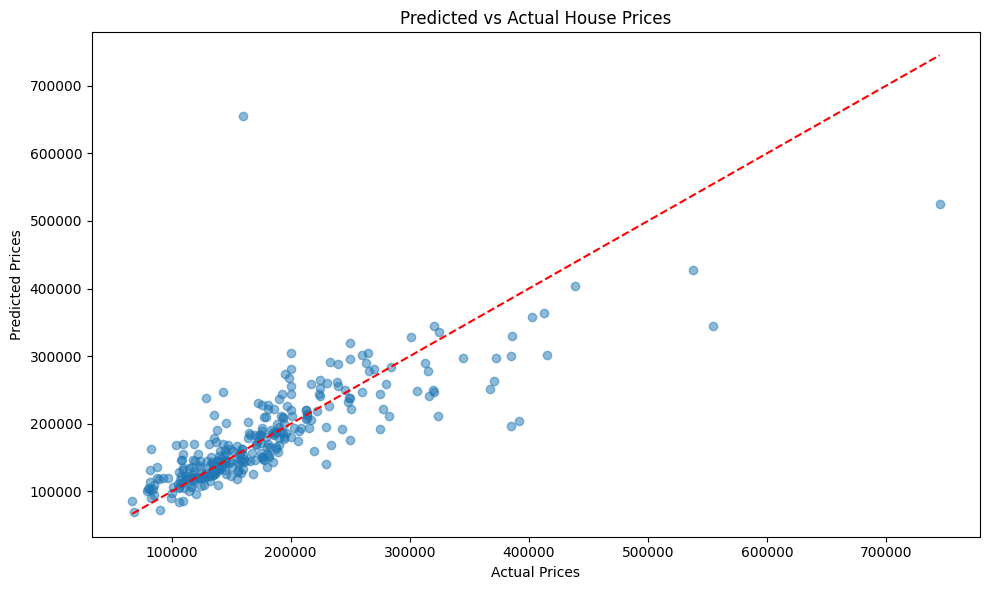

In [13]:
"""
TensorFlow implementation for House Prices regression
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Make sure we're using TensorFlow 2.x
print(f"TensorFlow version: {tf.__version__}")

# Load dataset
df = pd.read_csv("train.csv")

# Select features
features = ['GrLivArea', 'YearBuilt']
X = df[features]
y = df['SalePrice'].values.reshape(-1, 1)  # Target variable

# Convert to NumPy arrays
X = np.array(X)

# Standardize features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 200
n_hidden1 = 64
n_hidden2 = 32
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_output = 1  # Regression output

# Create the regression model using Keras API
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(n_input,),
                             kernel_initializer=tf.keras.initializers.RandomNormal()),
        tf.keras.layers.Dense(n_hidden2, activation='relu',
                             kernel_initializer=tf.keras.initializers.RandomNormal()),
        # No activation for regression output
        tf.keras.layers.Dense(n_output, activation=None,
                             kernel_initializer=tf.keras.initializers.RandomNormal())
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',  # Mean Squared Error for regression
        metrics=['mae']  # Mean Absolute Error as additional metric
    )
    
    return model

# Set random seed for reproducibility
tf.random.set_seed(0)
np.random.seed(0)

# Create and train the model
model = create_model()

# Define callbacks for training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('regression_model.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# Make predictions and convert back to original scale
test_predictions = model.predict(X_test)
pred_original = scaler_y.inverse_transform(test_predictions)
y_test_original = scaler_y.inverse_transform(y_test)

# Show sample predictions
print("\nSample predictions (original scale):")
for i in range(5):
    print(f"Predicted: ${pred_original[i][0]:.2f}, Actual: ${y_test_original[i][0]:.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.tight_layout()
plt.show()

TensorFlow version: 2.13.0
Epoch 1/20
540/540 [==============================] - 6s 10ms/step - loss: 0.2732 - accuracy: 0.9188 - val_loss: 0.1255 - val_accuracy: 0.9617
Epoch 2/20
  7/540 [..............................] - ETA: 5s - loss: 0.1801 - accuracy: 0.9443

c:\users\dr\documents\prog\datascience&machinelearning\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


540/540 [==============================] - 5s 9ms/step - loss: 0.1057 - accuracy: 0.9691 - val_loss: 0.0879 - val_accuracy: 0.9720
Epoch 3/20
540/540 [==============================] - 4s 8ms/step - loss: 0.0683 - accuracy: 0.9797 - val_loss: 0.0754 - val_accuracy: 0.9758
Epoch 4/20
540/540 [==============================] - 5s 9ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0786 - val_accuracy: 0.9772
Epoch 5/20
540/540 [==============================] - 5s 9ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0817 - val_accuracy: 0.9765
Epoch 6/20
540/540 [==============================] - 6s 12ms/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0739 - val_accuracy: 0.9792
Epoch 7/20
540/540 [==============================] - 7s 12ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0868 - val_accuracy: 0.9755
Epoch 8/20
540/540 [==============================] - 6s 10ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0755 - val_accuracy: 0.9802
Epoch 9/20
540

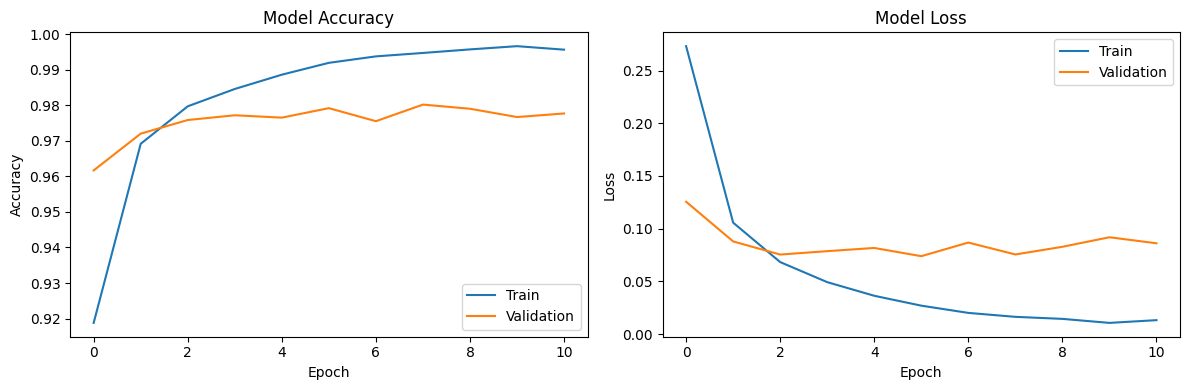

313/313 [==============================] - 1s 4ms/step


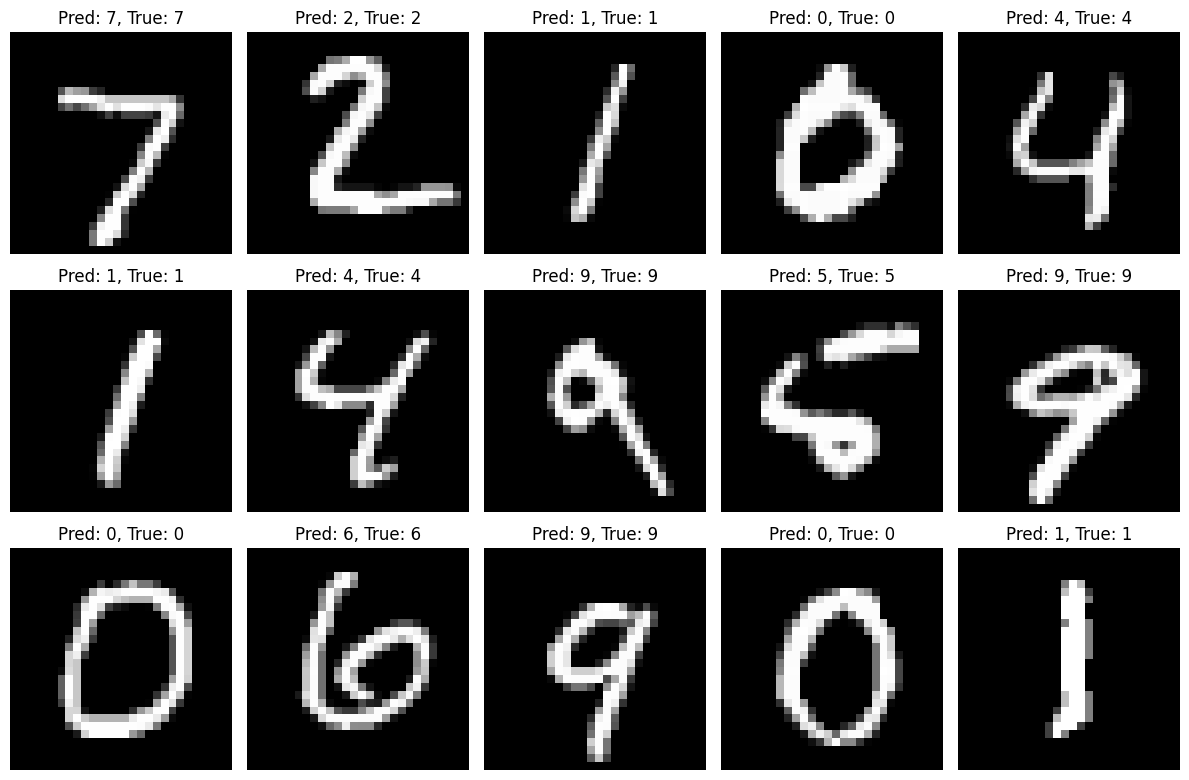

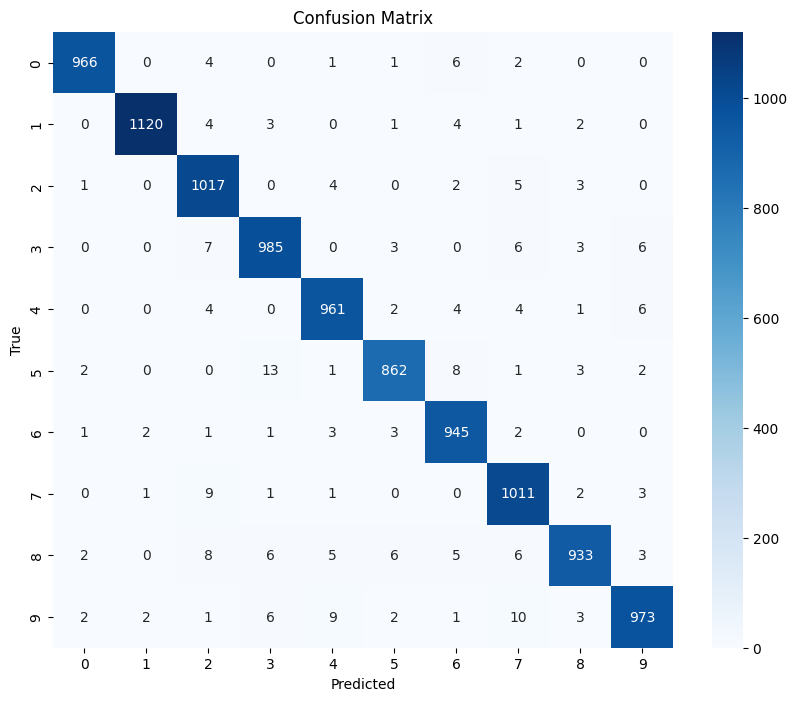

In [17]:
"""
TensorFlow implementation for MNIST digit classification
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Make sure we're using TensorFlow 2.x
print(f"TensorFlow version: {tf.__version__}")

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]
X_test = X_test / 255.0

# Reshape images to vectors
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Split training data to create validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_val_onehot = tf.keras.utils.to_categorical(y_val, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

# Hyperparameters
learning_rate = 0.001
batch_size = 100
num_epochs = 20
n_hidden1 = 256
n_hidden2 = 128
n_input = 784  # 28x28 pixels flattened
n_classes = 10  # 10 digits (0-9)

# Create the neural network using Keras API
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(n_input,),
                             kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.1),
                             bias_initializer=tf.keras.initializers.Constant(0.1)),
        tf.keras.layers.Dense(n_hidden2, activation='relu',
                             kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.1),
                             bias_initializer=tf.keras.initializers.Constant(0.1)),
        tf.keras.layers.Dense(n_classes, activation='softmax',
                             kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.1),
                             bias_initializer=tf.keras.initializers.Constant(0.1))
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Set random seed for reproducibility
tf.random.set_seed(0)
np.random.seed(0)

# Create and train the model
model = create_model()

# Define callbacks for training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('mnist_model.h5', save_best_only=True)

]

# Train the model
history = model.fit(
    X_train, y_train_onehot,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_val, y_val_onehot),
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Display some example predictions
plt.figure(figsize=(12, 8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()